# Introduction

Now that you know how to access and examine a dataset, you're ready to write your first SQL query! As you'll soon see, SQL queries will help you sort through a massive dataset, to retrieve only the information that you need.

We'll begin by using the keywords SELECT, FROM, and WHERE to get data from specific columns based on conditions you specify.

For clarity, we'll work with a small imaginary dataset pet_records which contains just one table, called pets.

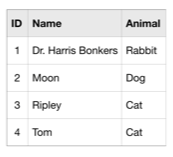

# SELECT ... FROM

The most basic SQL query selects a single column from a single table. To do this,

specify the column you want after the word SELECT, and then
specify the table after the word FROM.
For instance, to select the Name column (from the pets table in the pet_records database in the bigquery-public-data project), our query would appear as follows:

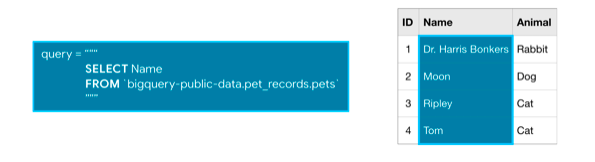

Note that when writing an SQL query, the argument we pass to FROM is not in single or double quotation marks (' or "). It is in backticks (`).

# WHERE ...

BigQuery datasets are large, so you'll usually want to return only the rows meeting specific conditions. You can do this using the WHERE clause.

The query below returns the entries from the Name column that are in rows where the Animal column has the text 'Cat'.
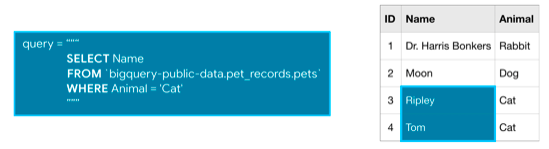

# Example: What are all the U.S. cities in the OpenAQ dataset?

Now that you've got the basics down, let's work through an example with a real dataset. We'll use an OpenAQ dataset about air quality.

First, we'll set up everything we need to run queries and take a quick peek at what tables are in our database. (Since you learned how to do this in the previous tutorial, we have hidden the code. But if you'd like to take a peek, you need only click on the "Code" button below.)

In [2]:
from google.cloud import bigquery

import os
os.environ["GOOGLE_APPLICATION_CREDENTIALS"]="/Users/macbookpro/Documents/5. Kaggle/3. SQL/orbital-caldron-272723-ed30f065fd90.json"

# Create a "Client" object
client = bigquery.Client()

# Construct a reference to the "openaq" dataset
dataset_ref = client.dataset("openaq", project="bigquery-public-data")

# API request - fetch the dataset
dataset = client.get_dataset(dataset_ref)

# List all the tables in the "openaq" dataset
tables = list(client.list_tables(dataset))

# Print names of all tables in the dataset (there's only one!)
for table in tables:  
    print(table.table_id)

global_air_quality


The dataset contains only one table, called global_air_quality. We'll fetch the table and take a peek at the first few rows to see what sort of data it contains.

In [3]:
# Construct a reference to the "global_air_quality" table
table_ref = dataset_ref.table("global_air_quality")

# API request - fetch the table
table = client.get_table(table_ref)

# Preview the first five lines of the "global_air_quality" table
client.list_rows(table, max_results=5).to_dataframe()

,location,city,country,pollutant,value,timestamp,unit,source_name,latitude,longitude,averaged_over_in_hours
0,"BTM Layout, Bengaluru - KSPCB",Bengaluru,IN,co,910.00,2018-02-22 03:00:00+00:00,µg/m³,CPCB,12.912811,77.60922,0.25
1,"BTM Layout, Bengaluru - KSPCB",Bengaluru,IN,no2,131.87,2018-02-22 03:00:00+00:00,µg/m³,CPCB,12.912811,77.60922,0.25
2,"BTM Layout, Bengaluru - KSPCB",Bengaluru,IN,o3,15.57,2018-02-22 03:00:00+00:00,µg/m³,CPCB,12.912811,77.60922,0.25
3,"BTM Layout, Bengaluru - KSPCB",Bengaluru,IN,pm25,45.62,2018-02-22 03:00:00+00:00,µg/m³,CPCB,12.912811,77.60922,0.25
4,"BTM Layout, Bengaluru - KSPCB",Bengaluru,IN,so2,4.49,2018-02-22 03:00:00+00:00,µg/m³,CPCB,12.912811,77.60922,0.25


Everything looks good! So, let's put together a query. Say we want to select all the values from the city column that are in rows where the country column is 'US' (for "United States").

In [4]:
# Query to select all the items from the "city" column where the "country" column is 'US'
query = """
        SELECT city
        FROM `bigquery-public-data.openaq.global_air_quality`
        WHERE country = 'US'
        """

# Submitting the query to the dataset


In [5]:
# Set up the query
query_job = client.query(query)

Next, we run the query and convert the results to a pandas DataFrame.

In [6]:
# API request - run the query, and return a pandas DataFrame
us_cities = query_job.to_dataframe()

Now we've got a pandas DataFrame called us_cities, which we can use like any other DataFrame.

In [7]:
# What five cities have the most measurements?
us_cities.city.value_counts().head()

Phoenix-Mesa-Scottsdale                     88
Houston                                     78
Los Angeles-Long Beach-Santa Ana            68
Riverside-San Bernardino-Ontario            58
New York-Northern New Jersey-Long Island    56
Name: city, dtype: int64

# Exercises
### 1) Units of measurement

Which countries have reported pollution levels in units of "ppm"?  In the code cell below, set `first_query` to an SQL query that pulls the appropriate entries from the `country` column.

In case it's useful to see an example query, here's some code from the tutorial:

```
query = """
        SELECT city
        FROM `bigquery-public-data.openaq.global_air_quality`
        WHERE country = 'US'
        """
```

In [12]:
first_query = """
        SELECT DISTINCT country
        FROM `bigquery-public-data.openaq.global_air_quality`
        WHERE unit = 'ppm'
        """

# Set up the query (cancel the query if it would use too much of 
# your quota, with the limit set to 10 GB)
safe_config = bigquery.QueryJobConfig(maximum_bytes_billed=10**10)
first_query_job = client.query(first_query, job_config=safe_config)

# API request - run the query, and return a pandas DataFrame
first_results = first_query_job.to_dataframe()

# View top few rows of results
print(first_results.head())

  country
0      US
1      CL
2      AU
3      BM
4      MX


### 2) High air quality

Which pollution levels were reported to be exactly 0?  
- Set `zero_pollution_query` to select **all columns** of the rows where the `value` column is 0.
- Set `zero_pollution_results` to a pandas DataFrame containing the query results.

In [14]:
# Query to select all columns where pollution levels are exactly 0
zero_pollution_query = """
                       SELECT *
                       FROM `bigquery-public-data.openaq.global_air_quality`
                       WHERE value = 0
                       """

# Set up the query
safe_config = bigquery.QueryJobConfig(maximum_bytes_billed=10**10)
query_job = client.query(zero_pollution_query, job_config=safe_config)

# API request - run the query and return a pandas DataFrame
zero_pollution_results = query_job.to_dataframe() # Your code goes here

print(zero_pollution_results.head())

                                        location          city country  \
0                     Victoria Memorial - WBSPCB       Kolkata      IN   
1  Rabindra Bharati University, Kolkata - WBSPCB       Kolkata      IN   
2                      Jelenia Góra - Ogińskiego  Jelenia Góra      PL   
3                               Końskie, MOBILNA       Końskie      PL   
4                               Końskie, MOBILNA       Końskie      PL   

  pollutant  value                 timestamp   unit source_name   latitude  \
0      pm25    0.0 2017-10-16 20:45:00+00:00  µg/m³        CPCB  22.572645   
1       so2    0.0 2017-10-28 14:30:00+00:00  µg/m³        CPCB  22.627874   
2        bc    0.0 2020-03-24 07:00:00+00:00  µg/m³        GIOS  50.913433   
3      pm10    0.0 2018-12-21 13:00:00+00:00  µg/m³        GIOS  51.189526   
4      pm25    0.0 2018-12-21 13:00:00+00:00  µg/m³        GIOS  51.189526   

   longitude  averaged_over_in_hours  
0  88.363890                    0.25  
1  88.38